# Nutritional Label OCR Project

## Project Objective

In summary, this project aims to create a food information service that provides users with additional information about the ingredients in their food products. By recognizing keywords in food labels, users can access more comprehensive information by clicking a button. This project addresses a common issue with existing nutritional label reading apps, which often rely on databases that may not contain all the necessary information or may not include new products. To overcome this limitation, this project uses image processing and text recognition techniques, leveraging Python libraries such as OpenCV and Pytesseract. By utilizing these tools, the project provides an efficient and accurate method for extracting information from food labels, enabling users to make informed decisions about their food choices.


## Major Checkpoints & Timeline
 1. **Installation of code packages** 
 2. **Image processing** 
 3. **Apply basic OCR to image and bracketing**
 4. **Returning results in a list to be searched**
 5. **Connecting to external data source to be searched with OCR results**




## 1 - Installation of code environment



1 - **Pillow** - a python imaging library that opens images *(comes with anaconda3)*


In [1]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


2 - **Opencv** - advanced image manipulation


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


3 - **Tesseract** - OCR prerequisite package

In [3]:
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.



## 2a -  Opening Files

### Opening files with Pillow
Pillow is for standard image processing and openCV for more advanced image processing tasks.



In [40]:
    
#import pillow
from PIL import Image

im_file = "data/page_01.jpg"

#load image into new object 
im = Image.open(im_file)
print (im) 

#// <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=485x402 at 0x7F99842FE460>

#open image in pop-up viewer
im.show()

#save a file
im.save("temp/page_01.jpg")

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=298x402 at 0x7FB979EBB0A0>


### Opening files with OpenCV
OpenCV is used for advanced image handling and processing

In [3]:

import cv2
# matplotlib is used to show plots, but used to show images inline in this environment
from matplotlib import pyplot as plt



Specify image directory and read

Sample image of nutritional label:

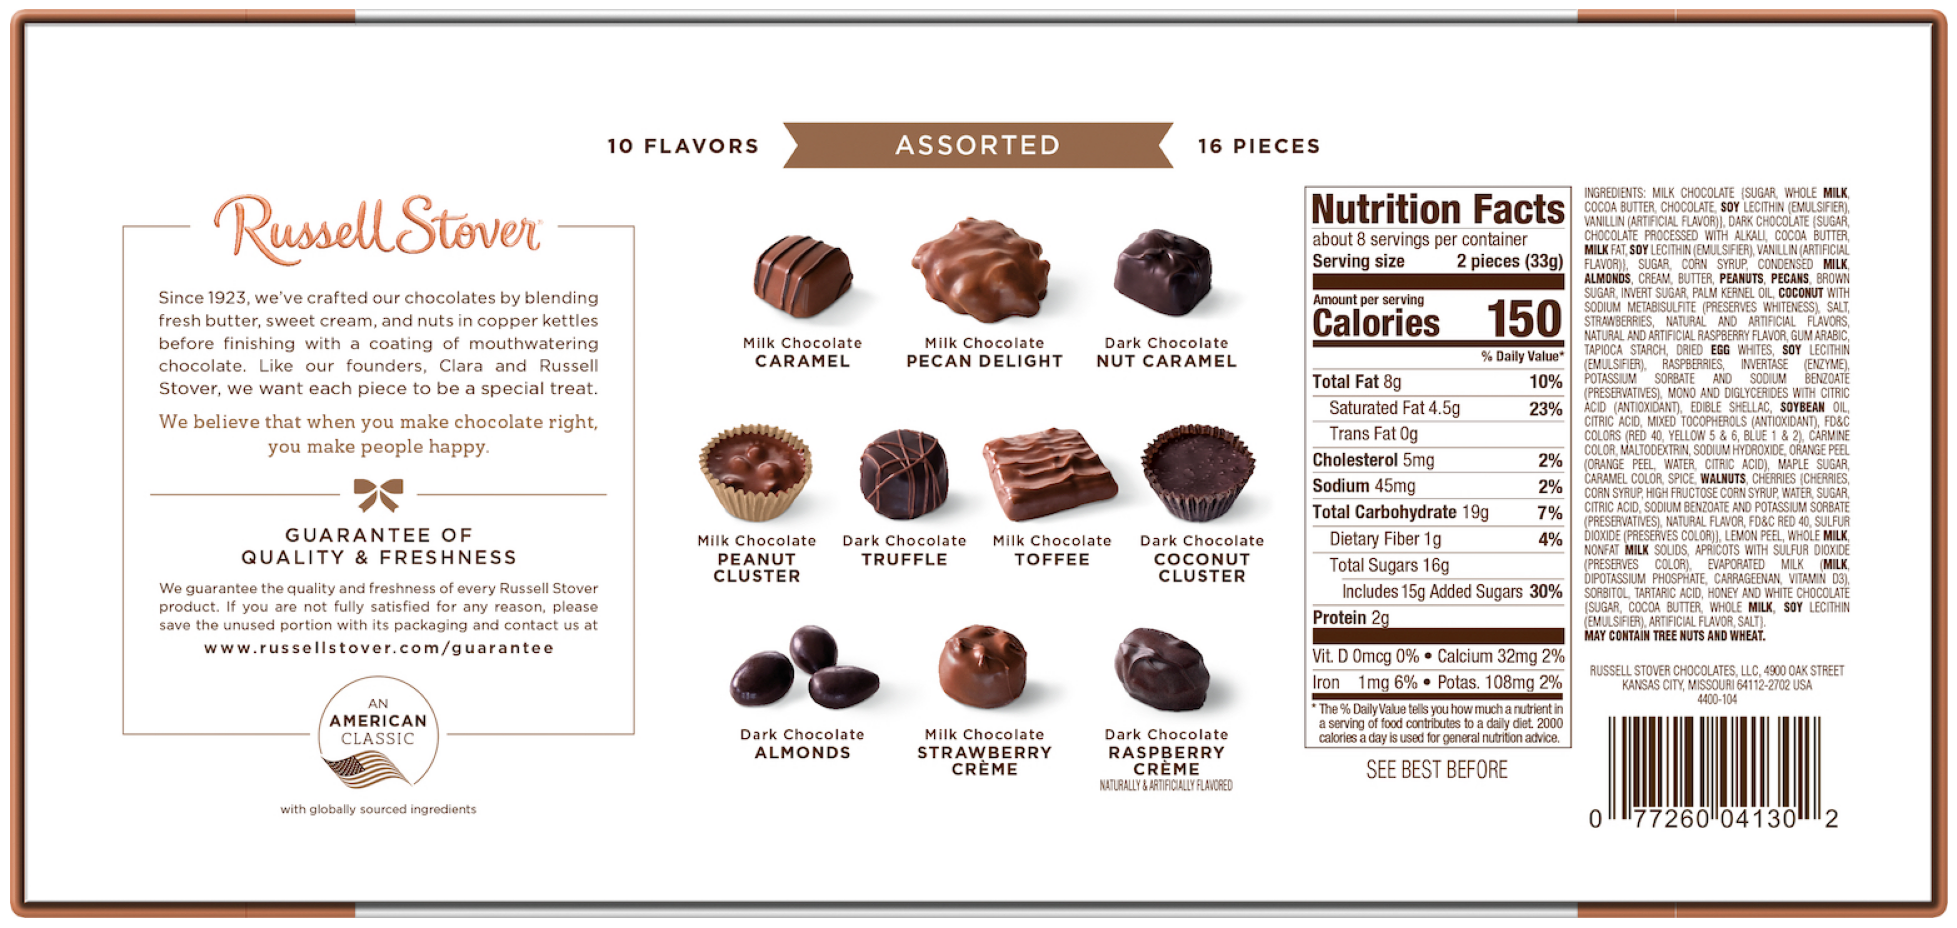

In [41]:
display("data/sample_label_box.jpeg")

In [42]:
img = cv2.imread("data/page_01.jpg")

<br>
The function below allows image to show up in the Jupyterlab environment inline using the matplotlib functions <br>
(https://stackoverflow.com/questions/28816046/%20displaying-different-images-with-actual-size-in-matplotlib-subplot)

In [14]:

# The function below allows image to show up in the Jupyterlab environment inline using the function display()
#https://stackoverflow.com/questions/28816046/%20displaying-different-images-with-actual-size-in-matplotlib-subplot
def display(im_path):
        
    dpi = 80
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()





When using Visual Studio environment, matplot lib is not required and you can display images simply by using openCV functionality:
```
cv2.imshow("original images", img)

#how long to keep preview window open in ms
cv2.waitKey(2000)
```

In [6]:
display("data/page_01.jpg")

'data/page_01.jpg'

## 2b - Basic image processing



**1. Inverted Images**

In [9]:
#invert the read 'img' from above
inverted_image = cv2.bitwise_not(img)

#where to save image
cv2.imwrite("temp/inverted.jpg", inverted_image)



True

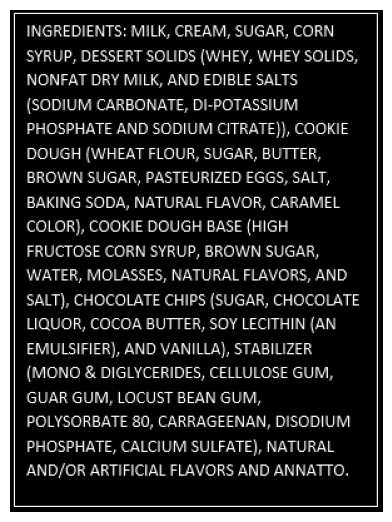

In [10]:
#show image
display("temp/inverted.jpg")

**2. Binarization** <br> 
Convert an image into grayscale, and then to black and white.

In [11]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray_image = grayscale(img)
cv2.imwrite("temp/gray.jpg", gray_image)

#display function dosen't work for gray / b&w photos b/c of depth loss, so use im.show() to display
im.show("temp/gray.jpg")

In [12]:
thresh, im_bw = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
cv2.imwrite("temp/bw_image.jpg", im_bw)

True

In [13]:
#black and white photo
im.show("temp/bw_image.jpg")

**3. Remove Borders** <br>

In [14]:
def remove_borders(image):
    contours, heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]
    return (crop)

## 3a - Apply basic OCR


Pillow is used for image handling and pytesseract is used for OCR


In [ ]:
from PIL import Image
import pytesseract

<br>Use any file that has high clarity or pre-processed with the steps above.

In [ ]:
#pay attention to the extension, some files are JPG and some are JPEG
img_file = 'data/page_05.JPEG'
img = Image.open(img_file)

Basic OCR processing without processing.

In [ ]:
ocr_result = pytesseract.image_to_string(img_file)

In [ ]:
print(img_file)
display(img_file)
print('\n')
print(ocr_result)

In [ ]:
print(img_file)
display(img_file)
print('\n')
print(ocr_result)

## 3b - Intermediate OCR functions

When there are multiple columns in the image, we have to use bounding boxes to define separate boundaries of OCR, and then apply the function individually. This creates congrugent and readable OCR results.

To create bounding boxes, the computer vision algo must receive the columns of text in blocks, so that it can draw boxes around the blocks of text to process.
To create the blocks, we must first blur and dilate the image.



Import all modules required

In [22]:

import pytesseract
import cv2
import numpy as np
from PIL import Image


Import functino for in-line display of images

In [35]:
from matplotlib import pyplot as plt

# The function below allows image to show up in the Jupyterlab environment inline using the function display()
#https://stackoverflow.com/questions/28816046/%20displaying-different-images-with-actual-size-in-matplotlib-subplot
def display(im_path):
        
    dpi = 80
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()




In [37]:
#select image to open
image = cv2.imread("data/page_05.JPEG")


In [42]:
#select ROI function
roi = cv2.selectROI(image)

#print rectangle points of selected roi
print(roi)

#Crop selected roi from raw image
roi_cropped = image[int(roi[1]):int(roi[1]+roi[3]), int(roi[0]):int(roi[0]+roi[2])]

#command to open window
cv2.namedWindow('display1')

#show cropped image
cv2.imshow("ROI", roi_cropped)
cv2.imwrite("temp/crop.jpg",roi_cropped)

#close windows (command specific to mac)
cv2.destroyAllWindows()
for i in range (1,5):
    cv2.waitKey(1)


(288, 163, 210, 47)


Bounding box selected:

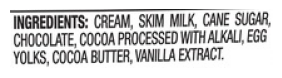

In [43]:
display("temp/crop.jpg")

### Perform OCR on the ROI:

In [44]:
ocr_result = pytesseract.image_to_string(roi_cropped)
print(ocr_result)

INGREDIENTS: CREAM, SKIM WILK, CANE SUGAR,
CHOCOLATE, COCOA PROCESSED WITH ALKAU, EGS
YOLKS, COCOA BUTTER, VANILLA EXTRACT.



Split the string at commas

In [45]:
print(type(ocr_result))
print(ocr_result.split(","))

<class 'str'>
['INGREDIENTS: CREAM', ' SKIM WILK', ' CANE SUGAR', '\nCHOCOLATE', ' COCOA PROCESSED WITH ALKAU', ' EGS\nYOLKS', ' COCOA BUTTER', ' VANILLA EXTRACT.\n']


Save ocr_result into a list of indidvidual ingredients in the variable 'results':

#### Cleaned list from OCR:

In [46]:
results= []
for item in ocr_result.split(","):
    results.append(item.strip())
print(results[1:])

['SKIM WILK', 'CANE SUGAR', 'CHOCOLATE', 'COCOA PROCESSED WITH ALKAU', 'EGS\nYOLKS', 'COCOA BUTTER', 'VANILLA EXTRACT.']


<br>


Create a function which cleans the individual ingredient names so they are usable. Placement of text replacement rules matter because of occuring themes: eg, word 'ingredients' show up often that can be ignored, 'and' can be ignored. 
The final result will require spaces to be replaced with underscores because the string will be transformed into a URL in the Wikipedia search term.

In [47]:
def clean(text):
    text = text.replace('INGREDIENTS', '')
    text = text.replace('INGREDIENT', '')
    text = text.replace(':', '')
    text = text.replace('`', '')
    text = text.replace('*', '')
    text = text.replace('{', '')
    text = text.replace('}', '')
    text = text.replace('[', '')
    text = text.replace(']', '')
    text = text.replace('(', '')
    text = text.replace(')', '')
    text = text.replace('>', '')
    text = text.replace('#', '')
    text = text.replace('+', '')
    text = text.replace('-', '')
    text = text.replace('.', '')
    text = text.replace('!', '')
    text = text.replace('$', '')
    text = text.replace('/', '')
    text = text.replace('‘', '')
    text = text.replace('\\', '')
    text = text.replace('AND', '\n')
    text = text.replace('\n',' ')
    text = text.replace(' ', '_')


    return text

#test
print(clean('TEST_*COOKIE\nDOUGH (WHEAT FLOUR'))
    
    
    
    
    

TEST_COOKIE_DOUGH_WHEAT_FLOUR


Add cleaned words into a new list

In [ ]:
clean_results = []


## 4 - Returning results in a list to be searched

In [48]:


#for item in ingredients: 
    #print(clean(item))
    
for item in results: 
    clean_results.append(clean(item))

print((clean_results))

['_CREAM', 'SKIM_WILK', 'CANE_SUGAR', 'CHOCOLATE', 'COCOA_PROCESSED_WITH_ALKAU', 'EGS_YOLKS', 'COCOA_BUTTER', 'VANILLA_EXTRACT']


There are duplicates in the result eg.  butter, corn, whey. Creating a set will remove the duplicates. 

We do not need the ingredients list to be 100% perfect eg. 80, AN etc. since it is a back-end dataset which would be used to match a database of ingredients. If a word does not match the database, it will simply be ignored. 


## 5 - Connecting to external data source to be searched with OCR results

Next we generate a predefined link to search wikipedia based on the ingredient name. We test it using "sodium" as an example

In [49]:
def print_link (ingredient):
  return "https://en.wikipedia.org/w/index.php?search={}".format(ingredient)

print(print_link("sodium"))



https://en.wikipedia.org/w/index.php?search=sodium


The link must not have spaces so we needed to treat the names so that spaces are underscores

In [50]:
for item in clean_results:
    print(item)
    print(print_link(item),'\n')

_CREAM
https://en.wikipedia.org/w/index.php?search=_CREAM 

SKIM_WILK
https://en.wikipedia.org/w/index.php?search=SKIM_WILK 

CANE_SUGAR
https://en.wikipedia.org/w/index.php?search=CANE_SUGAR 

CHOCOLATE
https://en.wikipedia.org/w/index.php?search=CHOCOLATE 

COCOA_PROCESSED_WITH_ALKAU
https://en.wikipedia.org/w/index.php?search=COCOA_PROCESSED_WITH_ALKAU 

EGS_YOLKS
https://en.wikipedia.org/w/index.php?search=EGS_YOLKS 

COCOA_BUTTER
https://en.wikipedia.org/w/index.php?search=COCOA_BUTTER 

VANILLA_EXTRACT
https://en.wikipedia.org/w/index.php?search=VANILLA_EXTRACT 



## Closing Summary

This project showcases the basic image handling and processing algorithm with openCV and pyTesseract, and python data transformation required for OCR text using pre-defined and highly legible image of ingredient labels. For less than perfect images that are uploaded from users from the cell phones cameras, there are various techniques and algorithms that can be used to automatically determine the amount of image processing required for less than perfect text images. 

One of the conventional approch is image quality assessment - this involves analyzing the image to identify various factors that may affect OCR accuracy, such as image resolution, contrast, brightness, and noise level. Based on this analysis, a score can be assigned to the image, which can be used to determine the level of image processing required.
Additionally, machine learning algorithms can be trained on a large dataset of text images and OCR results to learn patterns and correlations between image quality and OCR accuracy. This trained model can then be used to predict the level of image processing required for a given image.

The optimal approach will depend on the specific characteristics of the images and the requirements of the OCR application.

In addition to OCR and image processing, a predictive text algorithm can also be implemented to enhance the accuracy of the text recognition process. This is because relying solely on OCR and image processing may not always be effective, as the quality of the OCR output depends largely on the input provided by the user. By incorporating a predictive text algorithm, the system can analyze the OCR output and make suggestions for corrections or alternative words. Python packages such as pyEnchant or Natural Language Toolkit (NLTK) can be used to implement such an algorithm. These packages provide a range of tools for natural language processing, including spell-checking, grammar checking, and text normalization. By leveraging these tools, the system can improve the accuracy of the OCR output and provide more reliable information to users.

Subsequently, there will also require a GUI for uploading user generated images. The front-end implementation will depend on the platform it is intended for.

In summary, using a combination of OpenCV and Pytesseract can be a powerful tool for performing optical character recognition (OCR) on images. OpenCV provides a comprehensive set of image processing functions, such as image resizing, thresholding, and noise reduction, that can be used to optimize the image for OCR processing. Pytesseract, on the other hand, is a popular OCR engine that can recognize and extract text from images with high accuracy, especially when combined with proper image preprocessing techniques. 

By integrating these two libraries, developers can create robust OCR applications that can be used for a variety of purposes, such as digitizing paper documents, extracting text from images for further analysis, and automating data entry tasks. Overall, the use of OpenCV and Pytesseract for image OCR can save time and effort, improve data accuracy, and increase the efficiency of various business processes.

## Troubleshooting / FAQ: 

### 1.  Error: openCV, pytesseract or pillow not found:
* make sure you run pip install for the modules in the kernal of this notebook
* check the kernel source exists in the app's sidebar
    
### 2.  Error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'boundingRect'
> Overload resolution failed:
>  - array is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'array'error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'boundingRect'
> Overload resolution failed:
>  - array is not a numerical tuple 
>  - Expected Ptr<cv::UMat> for argument 'array'

> **cv2.findContours** outputs 2 values: contours, hierarchy. Ensure you are setting the correct number of inputs (2).
    I added a second input "hierarchy" in the second line and resolved problem that "array is not a numerical tuple"; program was asking for two values.
    > ``` cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0]) cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0]) ``` to <br> 
    > ```cnts, hierarchy = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0]) cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])```

### 3.  Things are not working after restarting kernal
* re-run code blocks for importing PIL, pytessearct, cv2, pyplot
    
### 4. In-line images are not loading properly or not refreshing after changing code
* restart kernal, re-import modules and try again

### 5. Window stuck or not responding
* restart kernal
* if image is too large, performance will be slow, reduce image size before selecting ROI
